In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('default')

In [24]:
df = pd.read_csv('./resources/60min_x1_summary.csv', header=[0], index_col=[0])
df

,noRET_RET,noRET_EM,noRET_SRT,10min_RET,10min_EM,10min_SRT,1h_RET,1h_EM,1h_SRT,6h_RET,6h_EM,6h_SRT
animal,,,,,,,,,,,,
#1,53.333333,27.483333,57.500000,70.266667,51.400000,NaN,18.900000,3.050000,16.950000,28.050000,2.766667,31.666667
#2,26.366667,17.216667,76.666667,28.350000,0.000000,NaN,30.283333,14.716667,49.166667,42.800000,28.333333,51.666667
#3,70.266667,38.883333,44.716667,26.933333,10.000000,NaN,44.150000,6.666667,37.216667,62.216667,19.983333,43.883333
#4,42.783333,35.000000,51.950000,72.483333,40.833333,NaN,69.983333,51.950000,68.900000,18.066667,4.983333,5.000000
#5,38.616667,16.383333,41.116667,63.633333,67.216667,NaN,67.500000,16.116667,15.833333,48.066667,5.000000,26.400000
#6,39.183333,16.383333,29.166667,46.950000,18.883333,NaN,38.600000,7.783333,16.950000,37.216667,10.566667,14.716667
#7,55.566667,36.133333,55.566667,35.833333,27.500000,NaN,36.933333,13.600000,27.516667,64.166667,19.733333,53.633333
#8,46.650000,35.566667,50.583333,35.283333,36.666667,NaN,67.783333,26.100000,42.783333,32.766667,20.000000,23.616667


In [25]:
pre_1h_em = df.loc['#5':'#8', '1h_EM']
post_1h_em  = df.loc['#1':'#4', '1h_EM']

pre_1h_srt = df.loc['#5':'#8', '1h_SRT']
post_1h_srt = df.loc['#1':'#4', '1h_SRT']

pre_diff = pre_1h_srt - pre_1h_em
post_diff = post_1h_srt - post_1h_em

In [26]:
pre_diff

animal
#5    -0.283333
#6     9.166667
#7    13.916667
#8    16.683333
dtype: float64

In [27]:
post_diff

animal
#1    13.90
#2    34.45
#3    30.55
#4    16.95
dtype: float64

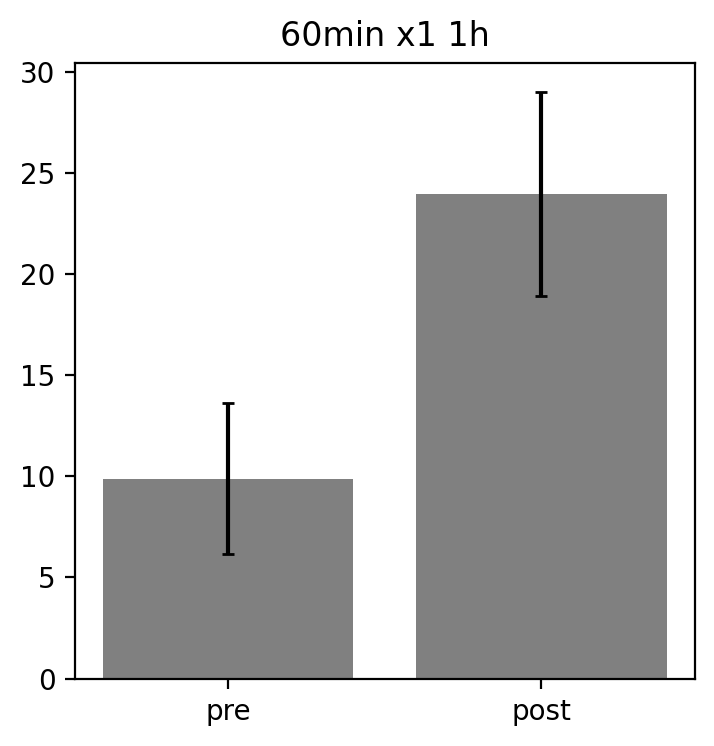

In [28]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
labels = ['pre', 'post']
for index, items in enumerate([pre_diff, post_diff]):
    mean, sem = items.mean(), items.sem()

    ax.bar(x=index, height=mean, yerr=sem, capsize=2, label=labels[index], align='center', color='gray')

ax.set_xticks(list(range(2)))
ax.set_title('60min x1 1h')
ax.set_xticklabels(labels=labels)
plt.show()

In [29]:
pre_6h_em = df.loc['#5':'#8', '6h_EM']
post_6h_em  = df.loc['#1':'#4', '6h_EM']

pre_6h_srt = df.loc['#5':'#8', '6h_SRT']
post_6h_srt = df.loc['#1':'#4', '6h_SRT']

pre_diff = pre_6h_srt - pre_6h_em
post_diff = post_6h_srt - post_6h_em

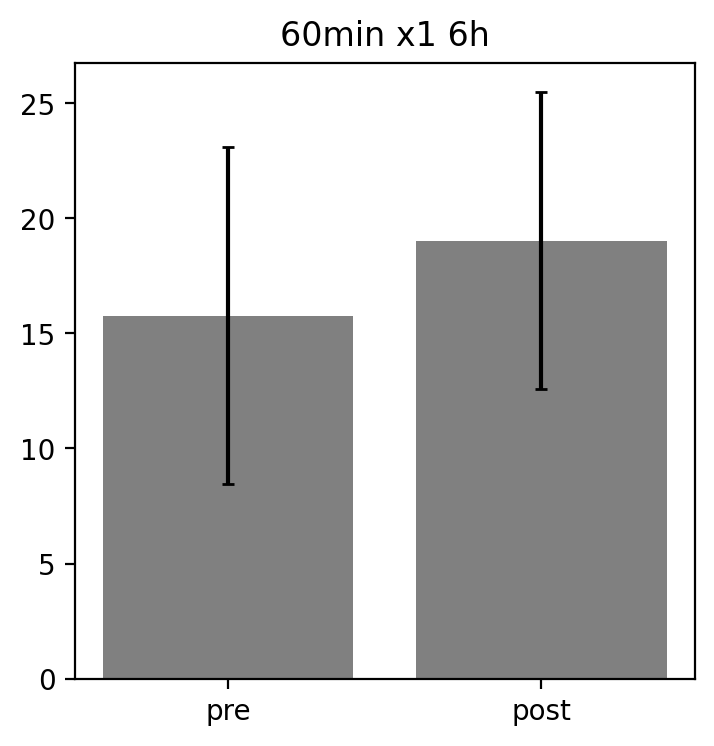

In [30]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
labels = ['pre', 'post']
for index, items in enumerate([pre_diff, post_diff]):
    mean, sem = items.mean(), items.sem()

    ax.bar(x=index, height=mean, yerr=sem, capsize=2, label=labels[index], align='center', color='gray')

ax.set_xticks(list(range(2)))
ax.set_title('60min x1 6h')
ax.set_xticklabels(labels=labels)
plt.show()

In [31]:
columns = ['noRET', '1h', '6h']
index = df.index
diff_df = pd.DataFrame(index=index, columns=columns)
diff_df

,noRET,1h,6h
animal,,,
#1,NaN,NaN,NaN
#2,NaN,NaN,NaN
#3,NaN,NaN,NaN
#4,NaN,NaN,NaN
#5,NaN,NaN,NaN
#6,NaN,NaN,NaN
#7,NaN,NaN,NaN
#8,NaN,NaN,NaN


In [32]:
for interval in columns:
    em = df.loc[:, '%s_EM' % interval]
    srt = df.loc[:, '%s_SRT' % interval]

    diff_df.loc[:, interval] = srt - em
diff_df

,noRET,1h,6h
animal,,,
#1,30.016667,13.900000,28.900000
#2,59.450000,34.450000,23.333333
#3,5.833333,30.550000,23.900000
#4,16.950000,16.950000,0.016667
#5,24.733333,-0.283333,21.400000
#6,12.783333,9.166667,4.150000
#7,19.433333,13.916667,33.900000
#8,15.016667,16.683333,3.616667


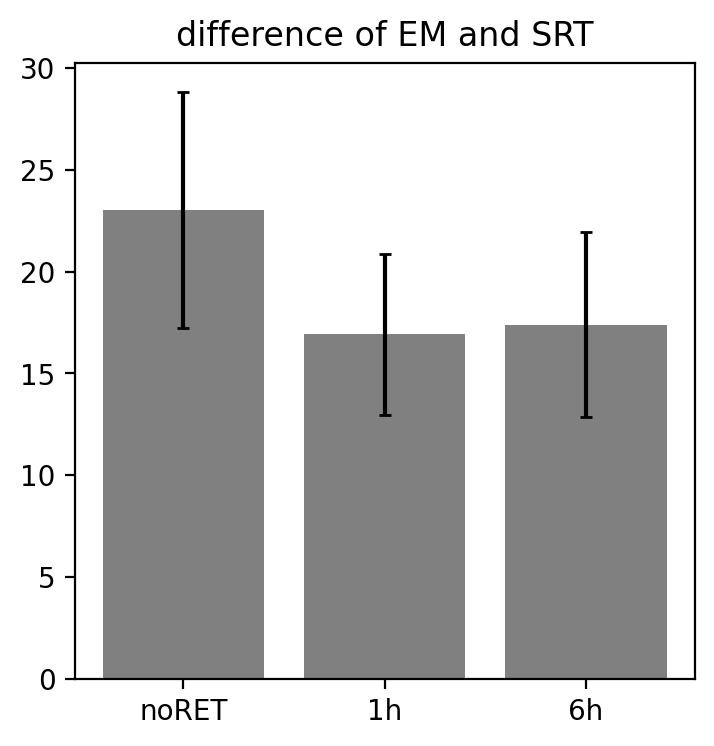

In [33]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
for index in range(len(columns)):
    interval = columns[index]
    _series = diff_df.loc[:, interval]
    mean, sem = _series.mean(), _series.sem()

    ax.bar(x=index, height=mean, yerr=sem, capsize=2, label=interval, align='center', color='gray')

ax.set_xticks(list(range(len(columns))))
ax.set_title('difference of EM and SRT')
ax.set_xticklabels(labels=columns)
plt.show()